# 



### data processing for OSCAR
    (download, transfromation, visualization)
#### *data download: ISMIP, SFTP servers (TRENDY), INPUT4MIP, CMIP6
#### *data transformation: file formats: csv, xlsx, netCDF, HDF5

##### Mostly relies on Pandas and Xarray. 
Pandas for reading and tranforming csv and xlsx files. These dataframes will be imported into xarray Datasets.
##### Xarray for processing netCDF, HDF5 files.
#### Region mask to aggregate gridded data over countries/regions
(At the resolution of data)
##### ---------------------------------------------------------------------
#### Different datasets: 15
##### Emission (7) : ACCMIP, CDIAC, CEDS (2017, 2021), CEDS-Gridded, EDGAR (v4.2, v4.32, v5, v6, v7 ), GFED4s, PRIMAP
##### Climate (3) : CRU-TS, GSWP3, CMIP6 (27 models x 6 experiments)
##### DGVMs (1) : TRENDY v7 (11 models x 4 experiments x 20 variables), v8 (9 models x 7 experiments x 20 variables)
##### land-use (3): LUH2, LUH1 (ongoing), Book-keeping data from Houghton et al. (2017, 2021)

## Import python packages

In [1]:
import xarray as xr
import regionmask as rg
import pandas as pd
import numpy as np
import dask
import geopandas as gpd
import sys
import os
import pysftp

## Import local functions

In [2]:
from pre_process import get_data_from_url
from pre_process import get_data_from_sftp
from pre_process import extra_functions
from pre_process import get_mask
from pre_process import get_regions

### Download data

#### From ISMIP repository

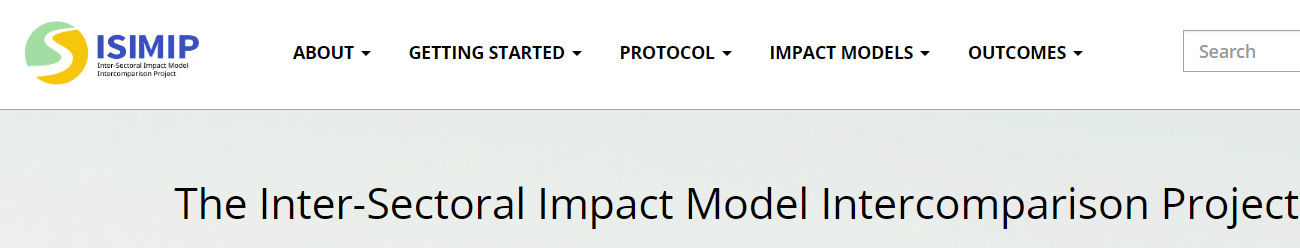

In [3]:
list_files = [
              'https://files.isimip.org/ISIMIP3a/InputData/climate/atmosphere/counterclim/global/daily/historical/GSWP3-W5E5/gswp3-w5e5_counterclim_tas_global_daily_1901_1910.nc'#,              
              #'https://files.isimip.org/ISIMIP3a/InputData/climate/atmosphere/counterclim/global/daily/historical/GSWP3-W5E5/gswp3-w5e5_counterclim_tas_global_daily_1911_1920.nc'
             ]

In [4]:
get_data_from_url.download_data(list_files, 'D:\oscar_functions\data')

saving to D:\oscar_functions\data\gswp3-w5e5_counterclim_tas_global_daily_1901_1910.nc
downloaded to folder D:\oscar_functions\data


#### From CMIP6 server

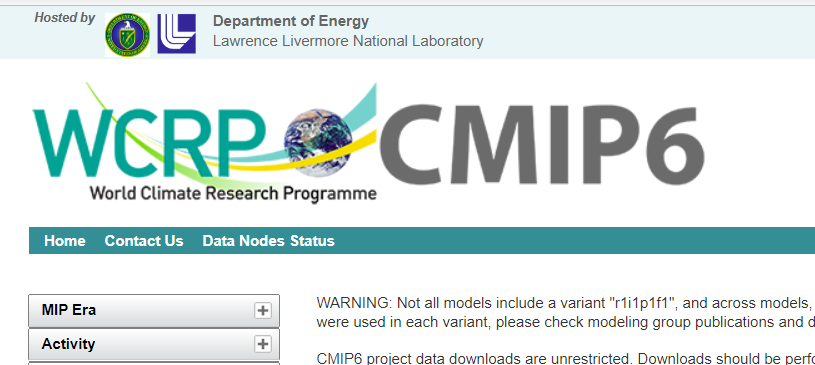

In [5]:
exp        = ['ssp119']           # experiment, can be passed as a list
cmip_model = ['CanESM5']          # model, can be passed as a list
var        = [('tas', 'Amon')]    # variable together with MIP table, can be passed as a list
ripf       = ['r9i1p1f1']         # realisation, can be passed as a list if not specified, will downlaod all available realizations 

# download:
extra_functions.extract_CMIP6_global(exp_list= exp, var_list=var, mod_list=cmip_model, ens = ripf, 
                                     out_dir= 'D:\oscar_functions\data')


 ************************************************** 
 ssp119 ('tas', 'Amon') 
 ************************************************** 

Search: {'replica': True, 'latest': True, 'project': 'CMIP6', 'variable': 'tas', 'table_id': 'Amon', 'experiment_id': 'ssp119', 'source_id': ['CanESM5'], 'member_id': ['r9i1p1f1']}
Hits: 4
Models: {'CanESM5': 4}
Members: {'r9i1p1f1': 4}
Experiments: {'ssp119': 4}
1 / 4 CMIP6.ScenarioMIP.CCCma.CanESM5.ssp119.r9i1p1f1.Amon.tas.gn.v20190429|esgf3.dkrz.de



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


2 / 4 CMIP6.ScenarioMIP.CCCma.CanESM5.ssp119.r9i1p1f1.Amon.tas.gn.v20190429|esgf.ceda.ac.uk



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


3 / 4 CMIP6.ScenarioMIP.CCCma.CanESM5.ssp119.r9i1p1f1.Amon.tas.gn.v20190429|esgf.nci.org.au



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------



 ************************************************** 

1 / 1 ('CanESM5', 'ssp119', 'r9i1p1f1', 'gn', 'Amon', 'tas')
['https://esgf.ceda.ac.uk/thredds/fileServer/esg_cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp119/r9i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_ssp119_r9i1p1f1_gn_201501-210012.nc']
100% [........................................................................] 27317549 / 27317549 


#### From Input4MIP server

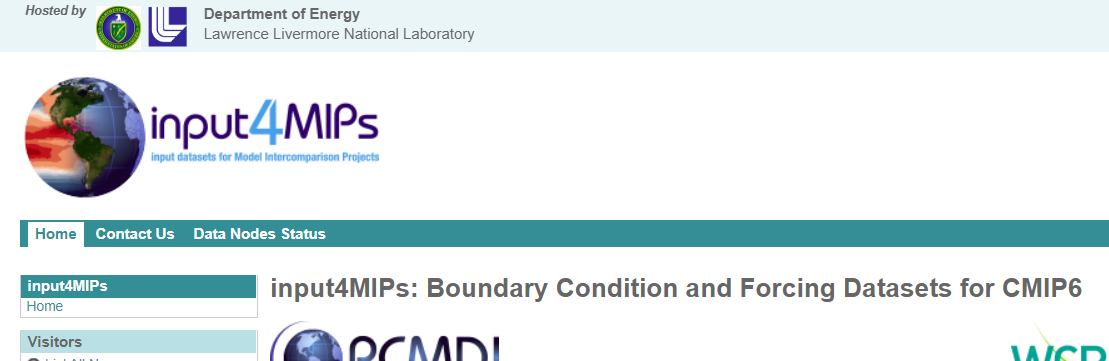

In [6]:
model_list = ['IAMC-MESSAGE-GLOBIOM-ssp245-1-1']  # model, can be passed as a list
var_list_ssp = ['BC_em_AIR_anthro']               # varibale, can be passed as a list

extra_functions.extract_CEDS_global(var_list= var_list_ssp, mod_list= model_list, out_dir= 'D:\oscar_functions\data')


 ************************************************** 
 BC_em_AIR_anthro 
 ************************************************** 

Search: {'replica': False, 'latest': True, 'project': 'input4mips', 'source_id': ['IAMC-MESSAGE-GLOBIOM-ssp245-1-1'], 'variable_id': 'BC_em_AIR_anthro'}
Hits: 1
Models: {'IAMC-MESSAGE-GLOBIOM-ssp245-1-1': 1}
1 / 1 input4MIPs.CMIP6.ScenarioMIP.IAMC.IAMC-MESSAGE-GLOBIOM-ssp245-1-1.atmos.mon.BC_em_AIR_anthro.gn.v20180628|aims3.llnl.gov



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------



 ************************************************** 

1 / 1 ('IAMC-MESSAGE-GLOBIOM-ssp245-1-1', 'gn', 'BC_em_AIR_anthro')
['http://aims3.llnl.gov/thredds/fileServer/user_pub_work/input4MIPs/CMIP6/ScenarioMIP/IAMC/IAMC-MESSAGE-GLOBIOM-ssp245-1-1/atmos/mon/BC_em_AIR_anthro/gn/v20180628/BC-em-AIR-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-MESSAGE-GLOBIOM-ssp245-1-1_gn_201501-210012.nc']
100% [......................................................................] 315781206 / 315781206 


#### From TRENDY SFTP server 
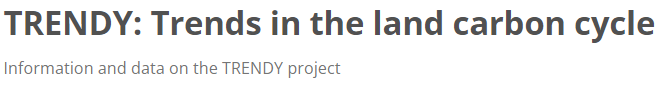

In [7]:
model= 'JSBACH'
simu = 'S0'
var = 'cVeg'

get_data_from_sftp.access_server(model, simu, var)

connection failed
=== downloading interruptedcVeg not fertig!!-- connection closed ===


Exception ignored in: <function Connection.__del__ at 0x0000022C236D4158>
Traceback (most recent call last):
  File "C:\Users\gaura\Anaconda3\lib\site-packages\pysftp\__init__.py", line 1013, in __del__
    self.close()
  File "C:\Users\gaura\Anaconda3\lib\site-packages\pysftp\__init__.py", line 784, in close
    if self._sftp_live:
AttributeError: 'Connection' object has no attribute '_sftp_live'


### Processing csv, xlsx files 

#### Example: EDGARv7 

In [3]:
# Test case only for one file.. 

input_file = 'data/Edgarv7/CH4_1970_2021.xlsx'

df = pd.read_excel(input_file, sheet_name=0)
df[:10]

,Content:,Emissions by country and main source category,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Compound:,CH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Start year:,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,End year:,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unit:,kt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Reference: European Commission, Joint Research...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Users of the data are obliged to acknowledge t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Data download:,https://edgar.jrc.ec.europa.eu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
9,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,CH4,bio,0.000007,0.000006,...,0.000401,0.000711,0.000749,0.000891,0.000732,0.000753,0.000929,0.000977,0.001014,0.001014


#### Formatting: remove rows which are not required and rename columns. 

In [8]:
# get the number of rows to be skipped

row_skip = df[df.values == 'IPCC_annex'].index[0] + 1

# future column names
ll = list(df.iloc[df[df.values == 'IPCC_annex'].index[0]].values)

# in the file Year are given in string from change the type of the year colunmns

yrs = [int(yr.split('_')[1]) for yr in ll if 'Y_' in yr]
extra = [yr for yr in ll if 'Y_' not in yr]

# all columns after datatype change for years. 
all_cols = extra + yrs

# sub dataframe after skipping unessary rows
sub_df = df[row_skip:]

dic_cols = dict(zip(list(sub_df.columns.values), all_cols))
sub_df = sub_df.rename(columns=dic_cols) 

sub_df= sub_df.rename(columns={'ipcc_code_2006_for_standard_report_name':'sector_name', 
                       'ipcc_code_2006_for_standard_report': 'sector_code'})        

sub_df.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,sector_code,sector_name,Substance,fossil_bio,1970,1971,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
9,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,CH4,bio,0.000007,0.000006,...,0.000401,0.000711,0.000749,0.000891,0.000732,0.000753,0.000929,0.000977,0.001014,0.001014
10,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.2,Manufacturing Industries and Construction,CH4,bio,0.003669,0.003507,...,0.002957,0.002066,0.002067,0.002214,0.002356,0.002878,0.002285,0.002357,0.002513,0.002513
11,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.4,Residential and other sectors,CH4,bio,0.002518,0.002415,...,0.013824,0.012871,0.014356,0.012984,0.014027,0.01396,0.014064,0.010886,0.016769,0.016769
12,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.5,Non-Specified,CH4,bio,0.000145,0.00014,...,0.004678,0.004692,0.005013,0.005642,0.005375,0.005614,0.005825,0.005671,0.006547,0.006547
13,Non-Annex_I,Rest Central America,ABW,Aruba,1.B.1,Solid Fuels,CH4,bio,0.0042,0.004124,...,0.064706,0.059231,0.063548,0.065383,0.061914,0.063464,0.064291,0.067368,0.070345,0.070345


In [9]:
# Combine years into one column
sub_df = pd.melt(sub_df, id_vars=['Name', 'sector_code',  'sector_name', 'fossil_bio'], 
             value_vars=yrs, var_name = 'year', value_name='CH4')
sub_df = sub_df.rename(columns={'sector_code':'sector'})
sub_df.head()

,Name,sector,sector_name,fossil_bio,year,CH4
0,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,bio,1970,0.000007
1,Aruba,1.A.2,Manufacturing Industries and Construction,bio,1970,0.003669
2,Aruba,1.A.4,Residential and other sectors,bio,1970,0.002518
3,Aruba,1.A.5,Non-Specified,bio,1970,0.000145
4,Aruba,1.B.1,Solid Fuels,bio,1970,0.0042


#### Import datafrome to xarray Dataset

In [10]:
sub_df = sub_df.drop(columns=['sector_name'])
sub_df = sub_df.set_index(['Name', 'sector', 'year', 'fossil_bio'])

In [11]:
sec_data_xr = xr.Dataset.from_dataframe(sub_df)
sec_data_xr

<xarray.Dataset>
Dimensions:     (Name: 210, sector: 23, year: 52, fossil_bio: 2)
Coordinates:
  * Name        (Name) object 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'
  * sector      (sector) object '1.A.1.a' '1.A.1.bc' '1.A.2' ... '4.D' '5.B'
  * year        (year) int64 1970 1971 1972 1973 1974 ... 2018 2019 2020 2021
  * fossil_bio  (fossil_bio) object 'bio' 'fossil'
Data variables:
    CH4         (Name, sector, year, fossil_bio) object 3.8284467446325e-05 ....

#### Final xarray Dataset after processing all  EDGARv7 xlsx files

In [12]:
ds_edgarv7 = xr.open_dataset('data/emissions_EDGARv7_06.nc')
ds_edgarv7

<xarray.Dataset>
Dimensions:           (year: 52, reg_mask: 249, sector: 37, spc_halo: 25, fuel_type: 2)
Coordinates:
  * year              (year) int64 1970 1971 1972 1973 ... 2018 2019 2020 2021
  * reg_mask          (reg_mask) int64 0 1 2 3 4 5 6 ... 243 244 245 246 247 248
  * sector            (sector) object '1.A.1.a' '1.A.2' ... '3.C.3' '2.A.2'
  * spc_halo          (spc_halo) object 'C2F6' 'C3F8' 'C4F10' ... 'SF6' 'c-C4F8'
  * fuel_type         (fuel_type) object 'bio' 'fossil'
    reg_mask_name     (reg_mask) object ...
    reg_mask_code     (reg_mask) object ...
    sector_long_name  (sector) object ...
Data variables:
    E_CH4             (year, reg_mask, sector, fuel_type) float32 ...
    E_CO2             (year, reg_mask, sector, fuel_type) float32 ...
    E_N2O             (year, reg_mask, sector, fuel_type) float32 ...
    E_Xhalo           (year, reg_mask, sector, spc_halo, fuel_type) float32 ...
Attributes:
    info:     EDGAR v7.0 historical anthropogenic emissions
    source:   https://edgar.jrc.ec.europa.eu/emissions_data_and_maps
    date:     28 November 2022

In [14]:
ds_edgarv7.to_dataframe()

E_CH4  E_CO2  E_N2O  E_Xhalo  \
year reg_mask sector  spc_halo fuel_type                                 
1970 0        1.A.1.a C2F6     bio          NaN    NaN    NaN      NaN   
                               fossil       NaN    NaN    NaN      NaN   
                      C3F8     bio          NaN    NaN    NaN      NaN   
                               fossil       NaN    NaN    NaN      NaN   
                      C4F10    bio          NaN    NaN    NaN      NaN   
...                                         ...    ...    ...      ...   
2021 248      2.A.2   NF3      fossil       NaN    NaN    NaN      NaN   
                      SF6      bio          NaN    NaN    NaN      NaN   
                               fossil       NaN    NaN    NaN      NaN   
                      c-C4F8   bio          NaN    NaN    NaN      NaN   
                               fossil       NaN    NaN    NaN      NaN   

                                         reg_mask_name reg_mask_code  \
year reg_mask sector  spc_halo fuel_type                               
1970 0        1.A.1.a C2F6     bio             Unknown           XXX   
                               fossil          Unknown           XXX   
                      C3F8     bio             Unknown           XXX   
                               fossil          Unknown           XXX   
                      C4F10    bio             Unknown           XXX   
...                                                ...           ...   
2021 248      2.A.2   NF3      fossil         Zimbabwe           ZWE   
                      SF6      bio            Zimbabwe           ZWE   
                               fossil         Zimbabwe           ZWE   
                      c-C4F8   bio            Zimbabwe           ZWE   
                               fossil         Zimbabwe           ZWE   

                                                                       sector_long_name  
year reg_mask sector  spc_halo fuel_type                                                 
1970 0        1.A.1.a C2F6     bio        Main Activity Electricity and Heat Production  
                               fossil     Main Activity Electricity and Heat Production  
                      C3F8     bio        Main Activity Electricity and Heat Production  
                               fossil     Main Activity Electricity and Heat Production  
                      C4F10    bio        Main Activity Electricity and Heat Production  
...                                                                                 ...  
2021 248      2.A.2   NF3      fossil                                   Lime production  
                      SF6      bio                                      Lime production  
                               fossil                                   Lime production  
                      c-C4F8   bio                                      Lime production  
                               fossil                                   Lime production  

[23953800 rows x 7 columns]

### Processing netCDF files

#### single file

In [15]:
ds_accmip_single = xr.open_dataset('data/ACCMIP/IPCC_emissions_BC_anthropogenic_1850_0.5x0.5_v1_21_05_2009.nc')
ds_accmip_single

<xarray.Dataset>
Dimensions:           (lat: 360, lon: 720, time: 12)
Coordinates:
  * lat               (lat) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * lon               (lon) float32 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
  * time              (time) datetime64[ns] 1850-01-15 1850-02-15 ... 1850-12-15
Data variables:
    date              (time) int32 ...
    molecular_weight  float32 ...
    emiss_dom         (time, lat, lon) float32 ...
    emiss_ene         (time, lat, lon) float32 ...
    emiss_ind         (time, lat, lon) float32 ...
    emiss_tra         (time, lat, lon) float32 ...
    emiss_wst         (time, lat, lon) float32 ...
    emiss_awb         (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.0
    author:       Jean-Francois Lamarque (NCAR):lamar@ucar.edu
    date:         2009-05-21
    reference:    TBD

#### multiple files

In [16]:
list_accmip_files = os.listdir('data/ACCMIP/')
list_accmip_files

['IPCC_emissions_BC_anthropogenic_1850_0.5x0.5_v1_21_05_2009.nc',
 'IPCC_emissions_BC_anthropogenic_1860_0.5x0.5_v1_21_05_2009.nc',
 'IPCC_emissions_BC_anthropogenic_1870_0.5x0.5_v1_21_05_2009.nc',
 'IPCC_emissions_BC_anthropogenic_1880_0.5x0.5_v1_21_05_2009.nc',
 'IPCC_emissions_BC_anthropogenic_1890_0.5x0.5_v1_21_05_2009.nc',
 'IPCC_emissions_BC_anthropogenic_1900_0.5x0.5_v1_21_05_2009.nc']

In [17]:
ds_accmip_multi = xr.open_mfdataset('data/ACCMIP/*.nc') # list of files can also be passed
ds_accmip_multi 

<xarray.Dataset>
Dimensions:           (lat: 360, lon: 720, time: 72)
Coordinates:
  * lat               (lat) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * lon               (lon) float32 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
  * time              (time) datetime64[ns] 1850-01-15 1850-02-15 ... 1900-12-15
Data variables:
    date              (time) int32 dask.array<chunksize=(12,), meta=np.ndarray>
    molecular_weight  (time) float32 12.0 12.0 12.0 12.0 ... 12.0 12.0 12.0 12.0
    emiss_dom         (time, lat, lon) float32 dask.array<chunksize=(12, 360, 720), meta=np.ndarray>
    emiss_ene         (time, lat, lon) float32 dask.array<chunksize=(12, 360, 720), meta=np.ndarray>
    emiss_ind         (time, lat, lon) float32 dask.array<chunksize=(12, 360, 720), meta=np.ndarray>
    emiss_tra         (time, lat, lon) float32 dask.array<chunksize=(12, 360, 720), meta=np.ndarray>
    emiss_wst         (time, lat, lon) float32 dask.array<chunksize=(12, 360, 720), meta=np.ndarray>
    emiss_awb         (time, lat, lon) float32 dask.array<chunksize=(12, 360, 720), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    author:       Jean-Francois Lamarque (NCAR):lamar@ucar.edu
    date:         2009-05-21
    reference:    TBD

In [18]:
ds_accmip_multi.emiss_dom

<xarray.DataArray 'emiss_dom' (time: 72, lat: 360, lon: 720)>
dask.array<concatenate, shape=(72, 360, 720), dtype=float32, chunksize=(12, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1850-01-15 1850-02-15 ... 1900-12-15
Attributes:
    long_name:               Domestic sector emissions for BC
    units:                   kg m-2 s-1
    molecular_weight:        12.0
    molecular_weight_units:  g mole-1

In [19]:
ds_accmip_multi.groupby('time.year').sum('time')

<xarray.Dataset>
Dimensions:           (lat: 360, lon: 720, year: 6)
Coordinates:
  * lat               (lat) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * lon               (lon) float32 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
  * year              (year) int64 1850 1860 1870 1880 1890 1900
Data variables:
    date              (year) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    molecular_weight  (year) float32 144.0 144.0 144.0 144.0 144.0 144.0
    emiss_dom         (year, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    emiss_ene         (year, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    emiss_ind         (year, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    emiss_tra         (year, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    emiss_wst         (year, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    emiss_awb         (year, lat, lon) float32 dask.array<chunksize=(1, 360, 720), meta=np.ndarray>

### Aggregating gridded data into regions/countries

#### Regionmask

<GeoAxesSubplot:>

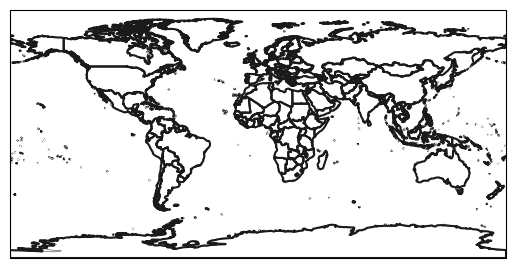

In [20]:
regions = rg.defined_regions.natural_earth_v5_0_0.countries_50
regions.plot(add_label=False)

#### 3D-boolean mask

In [21]:
lon = np.arange(-179.5, 180)
lat = np.arange(-89.5, 90)

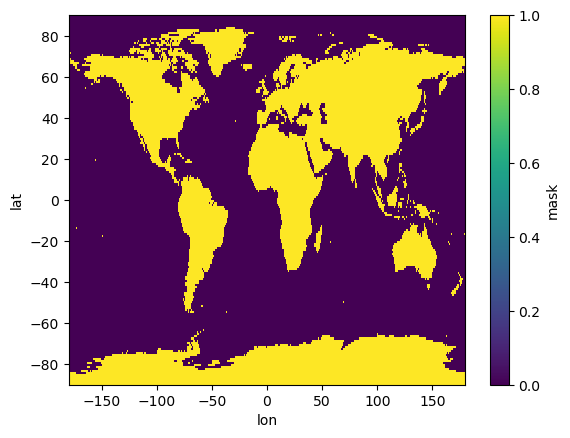

In [22]:
mask = rg.defined_regions.natural_earth_v5_0_0.countries_50.mask_3D(lon, lat)
mask.sum('region').plot()

In [12]:
mask

<xarray.DataArray 'mask' (region: 172, lat: 180, lon: 360)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * region   (region) int32 0 1 2 3 4 6 7 8 ... 230 231 233 234 235 236 237 239
    abbrevs  (region) <U4 'ZW' 'ZM' 'YE' 'VN' 'VE' ... 'AND' 'DZ' 'AL' 'AF' 'AQ'
    names    (region) <U24 'Zimbabwe' 'Zambia' ... 'Afghanistan' 'Antarctica'

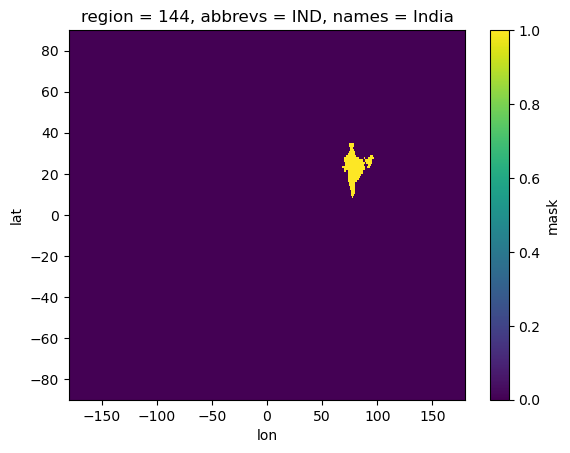

In [24]:
mask.sel(region=mask.names=='India').plot()


#### Custom regions and corresponding masks (defined on the resolution of data)

<GeoAxesSubplot:>

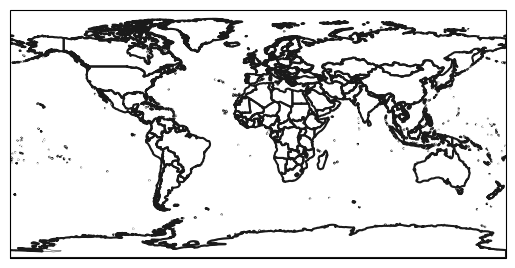

In [5]:
# shapefiles can be read in geopandas and used in regionmask to define a custom region
# in this case, I have all countries with France and Netherland separated into main land and other regions. 
custom_regions = get_regions.get_regions()
custom_regions.plot(add_label=False)

In [3]:
ds_jsb = xr.open_dataset('data/Trendyv8/JSBACH_S0_cVeg.nc')
ds_jsb = ds_jsb.rename({'latitude':'lat', 'longitude':'lon'})

#### mask corresponding to custom regions.. 

In [8]:
custom_mask = get_mask.get_grid_mask(ds_jsb, custom_regions, res=0.5)
custom_mask#.sum('reg_mask')#.plot()

fixed lat.. for  masked_regions
fixed lon.. for  masked_regions


<xarray.DataArray 'masked_regions' (reg_mask: 198, lat: 96, lon: 192)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat            (lat) float64 -88.57 -86.72 -84.86 ... 84.86 86.72 88.57
  * lon            (lon) float64 -180.0 -178.1 -176.2 ... 174.4 176.2 178.1
  * reg_mask       (reg_mask) int32 1 2 3 4 7 9 11 ... 242 243 245 246 247 248
    reg_mask_code  (reg_mask) <U3 'AFG' 'ALA' 'ALB' 'DZA' ... 'YEM' 'ZMB' 'ZWE'
    reg_mask_name  (reg_mask) <U44 'Afghanistan' 'Aland' ... 'Zambia' 'Zimbabwe'

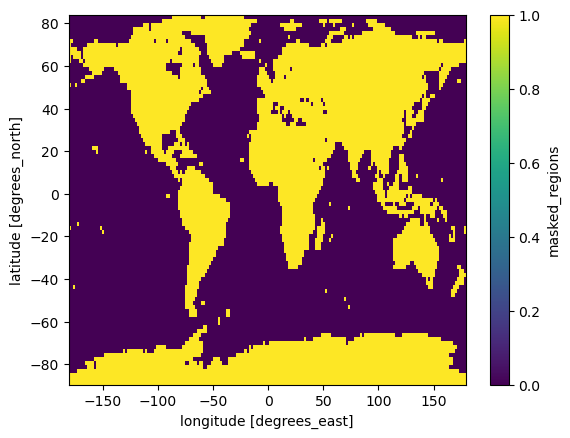

In [18]:
custom_mask.where(custom_mask.notnull(), drop=True).sum('reg_mask').plot()

#### land mask

fixed lat.. for  masked_regions
fixed lon.. for  masked_regions


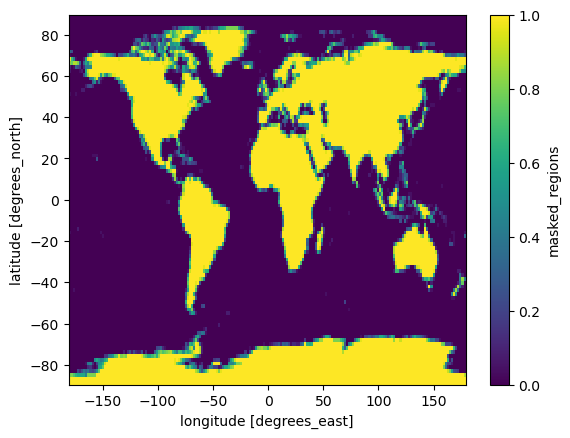

In [23]:
custom_mask_land = get_mask.get_land_mask(ds_jsb, custom_regions, res=0.5)
custom_mask_land.sum('reg_mask', min_count=1).plot()

#### land mask excluding ice and water bodies

248 0.5
fixed lat.. for  None
fixed lon.. for  None


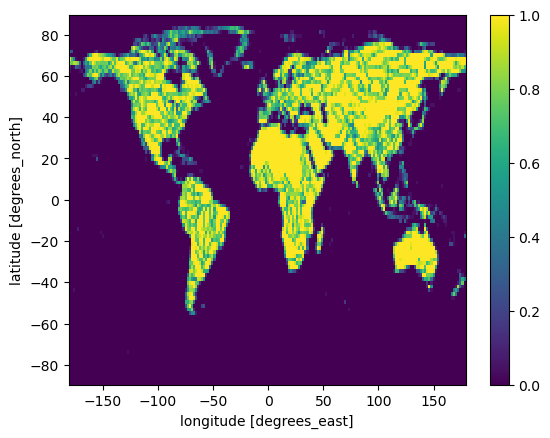

In [24]:
custom_mask_full = get_mask.get_full_land_mask(ds_jsb, custom_regions, res=0.5)
custom_mask_full.sum('reg_mask', min_count=1).plot()

#### higher resolution:

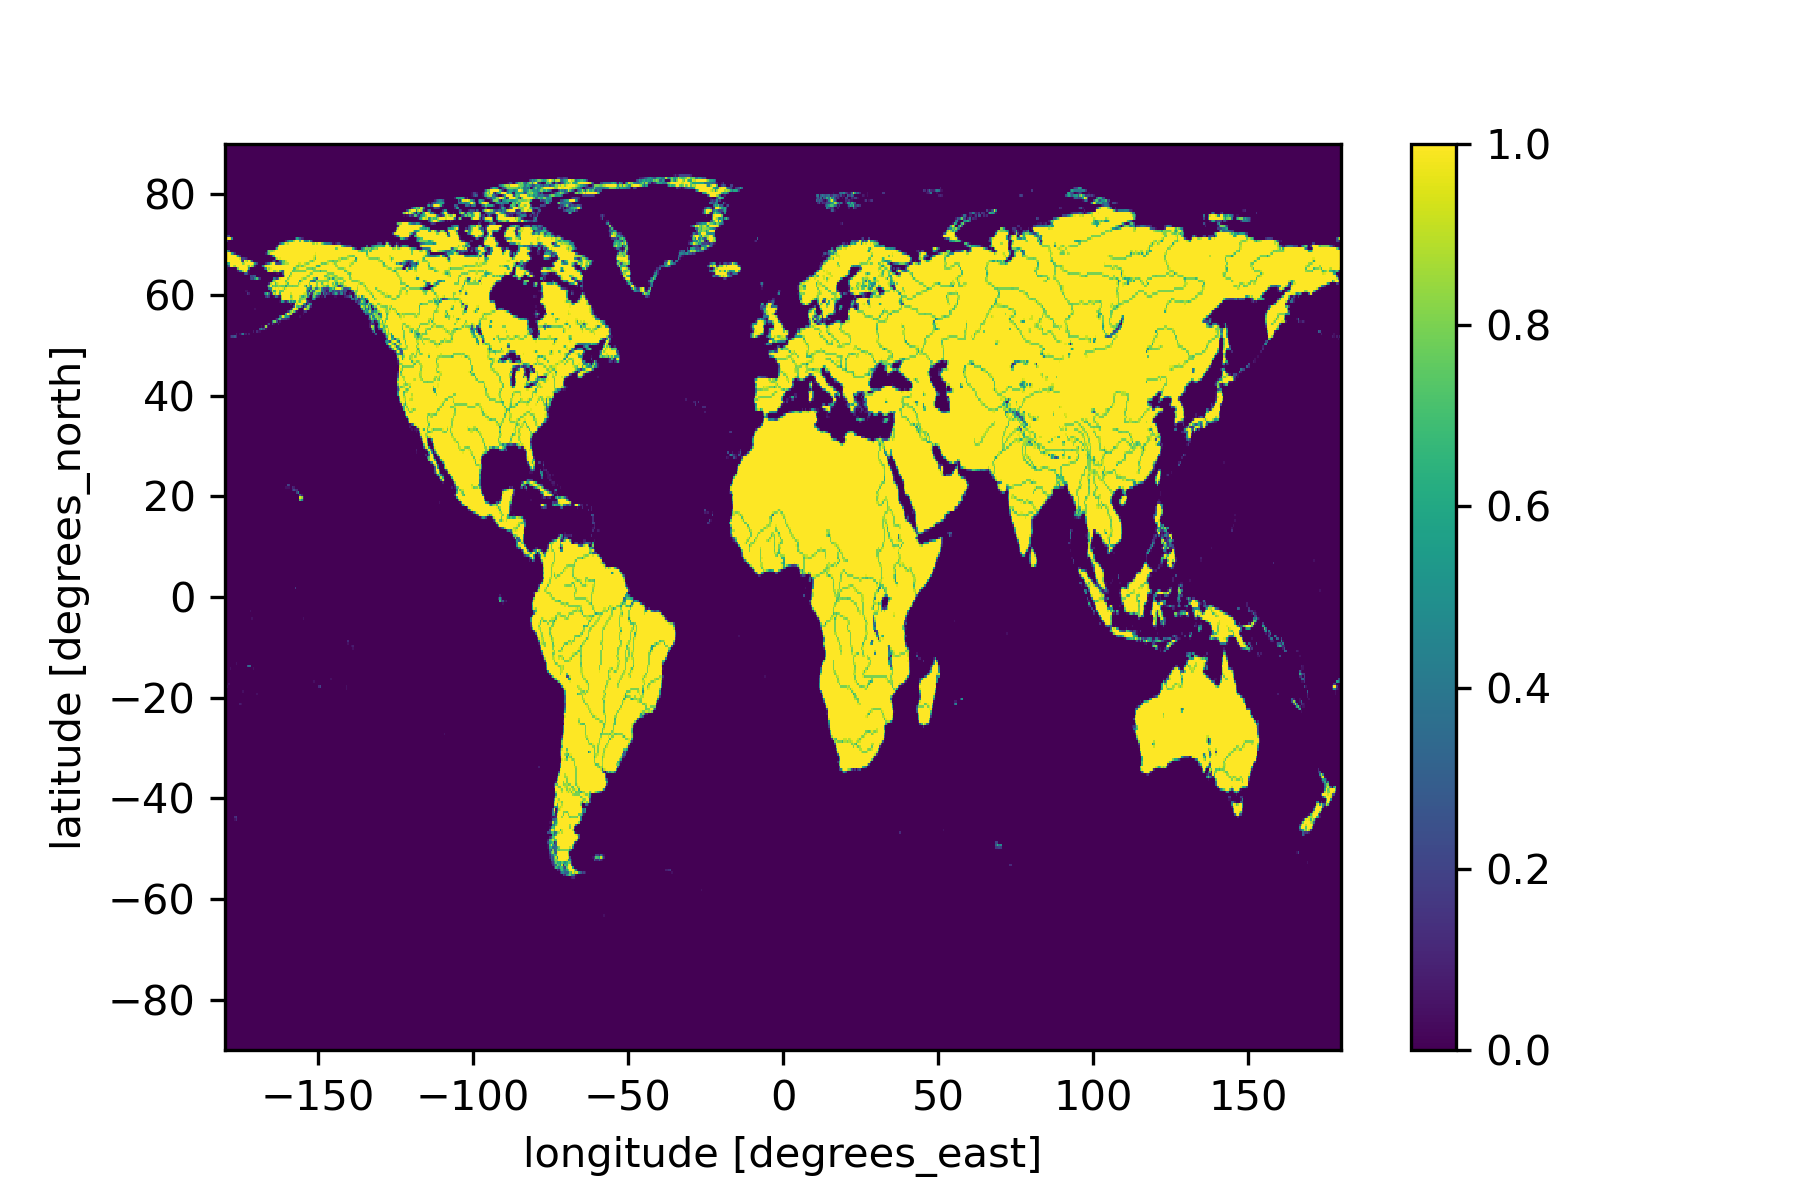

### More processing:

#### TRENDY models: ORCHIDEE, exp= S0, var = cVeg

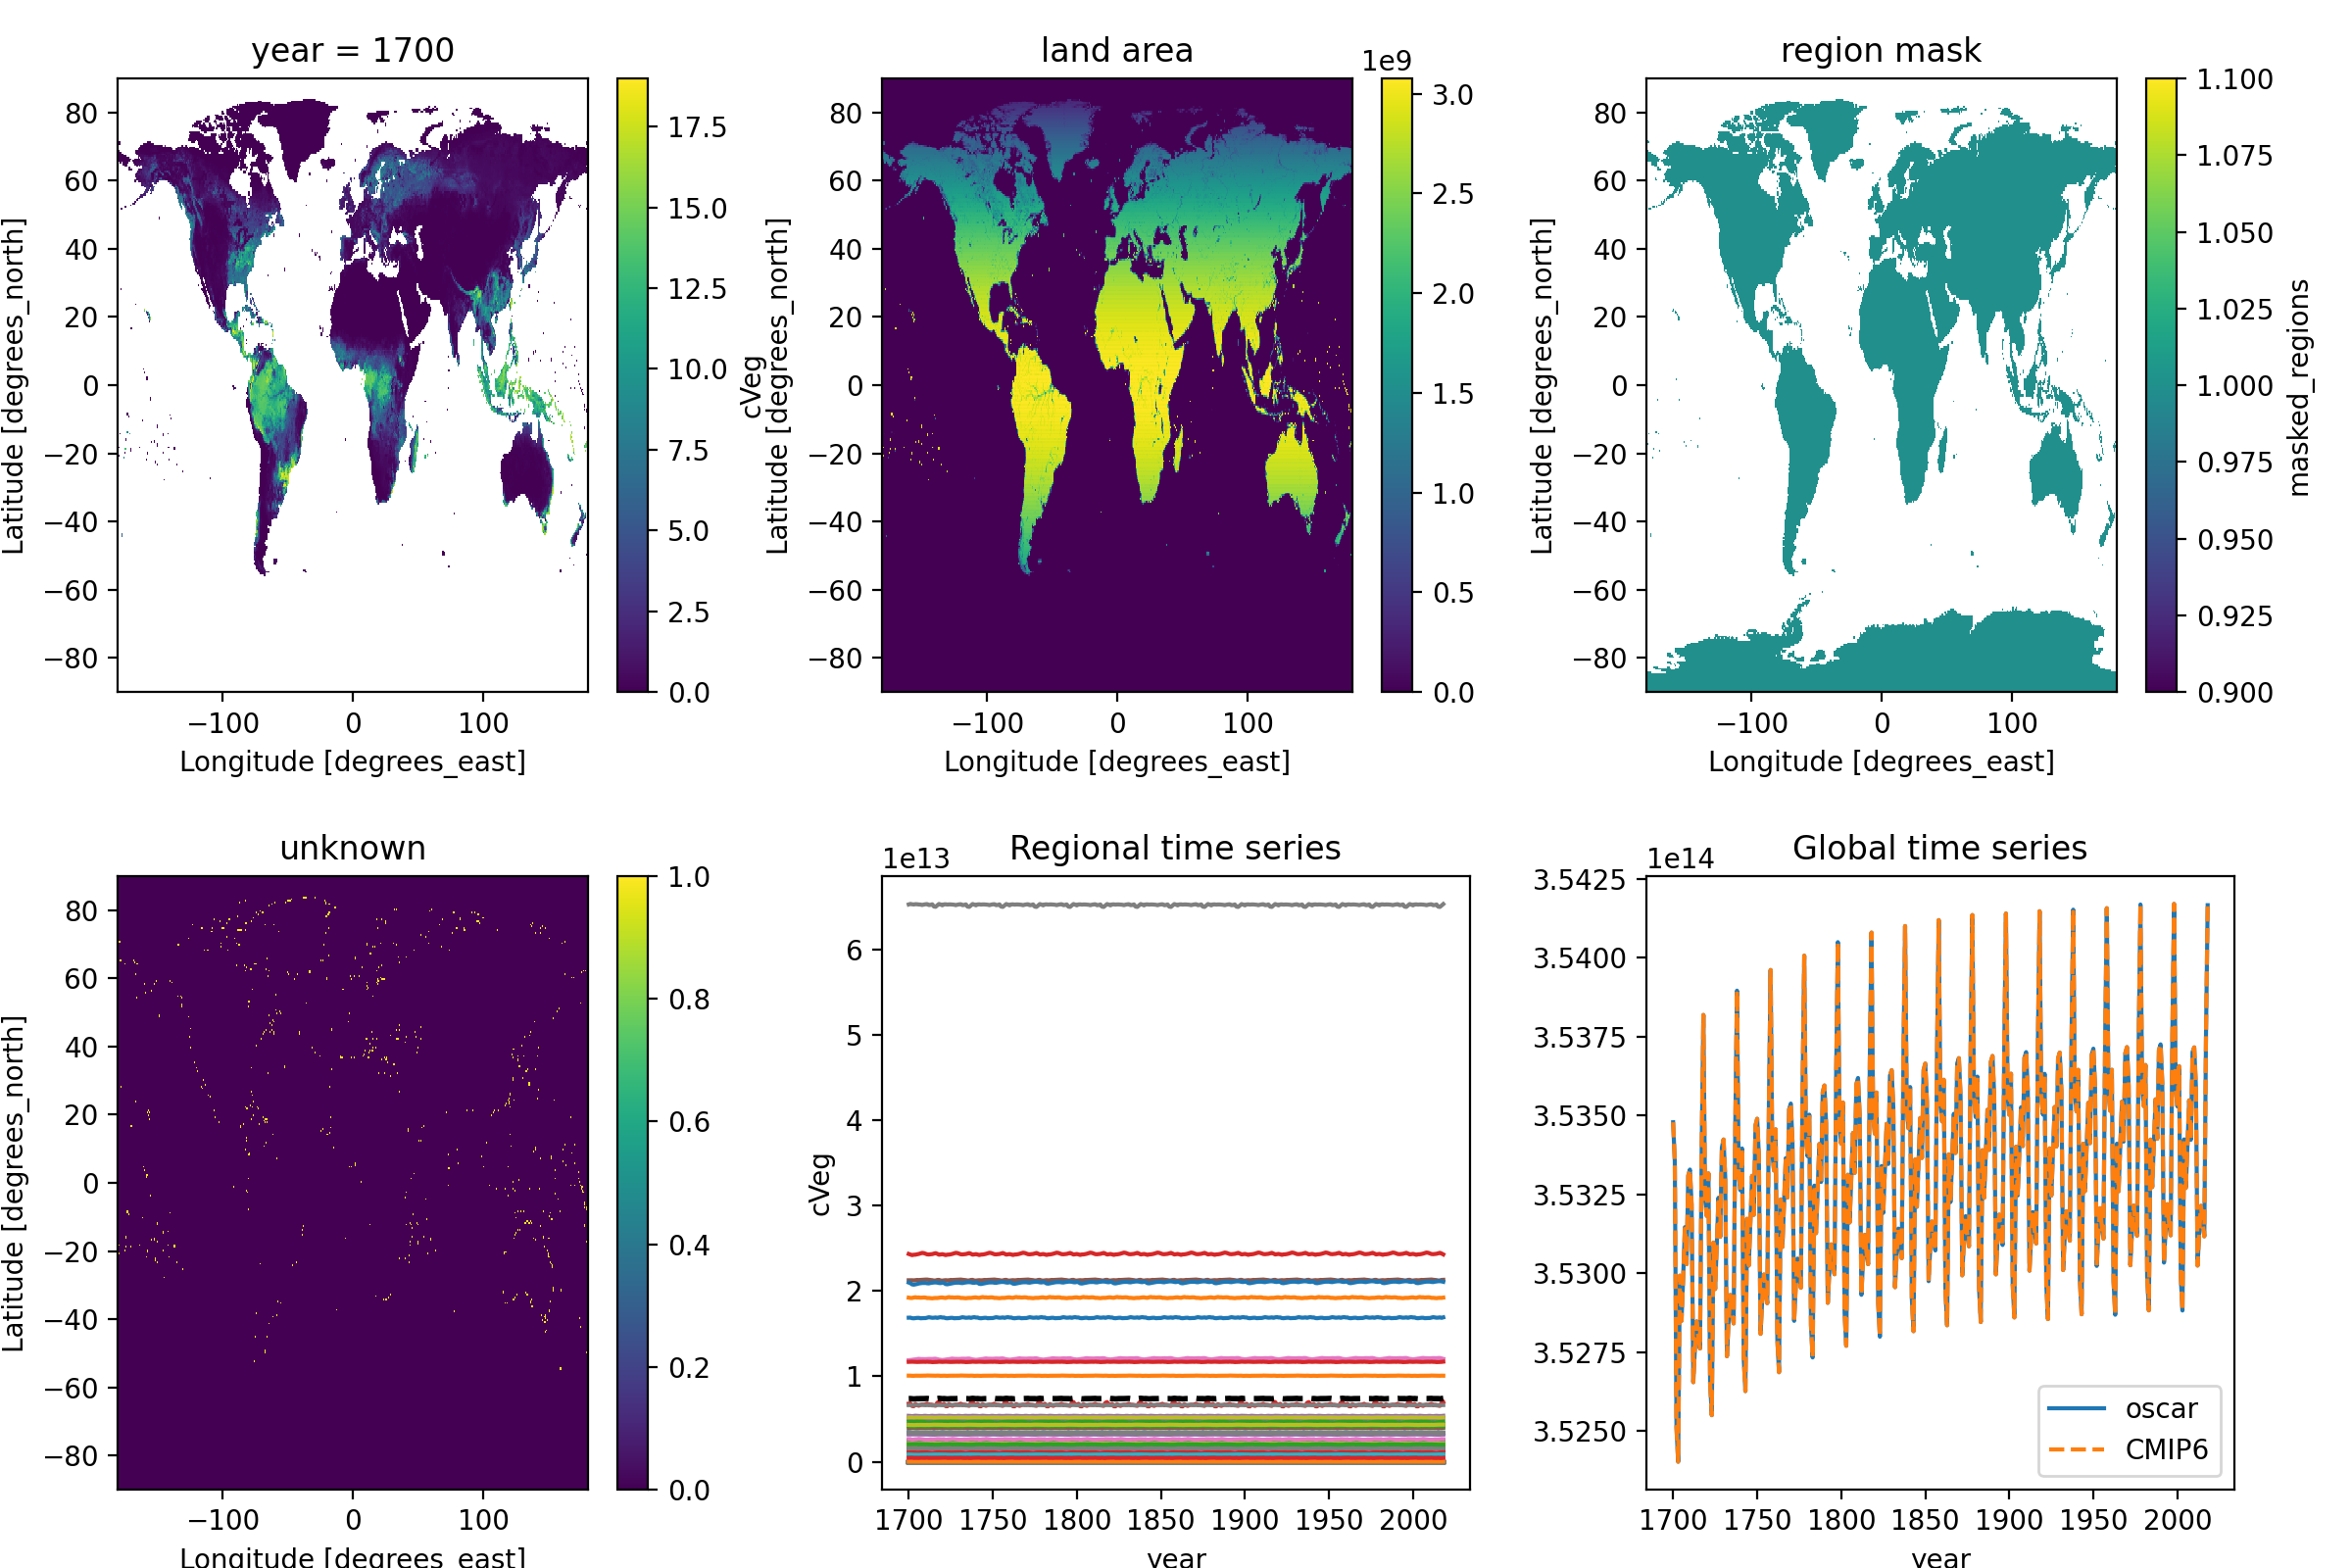

#### CMIP6, model: CAMS-CSM1-0, exp: SSP119, ens: r1i1p1f1, var: tas

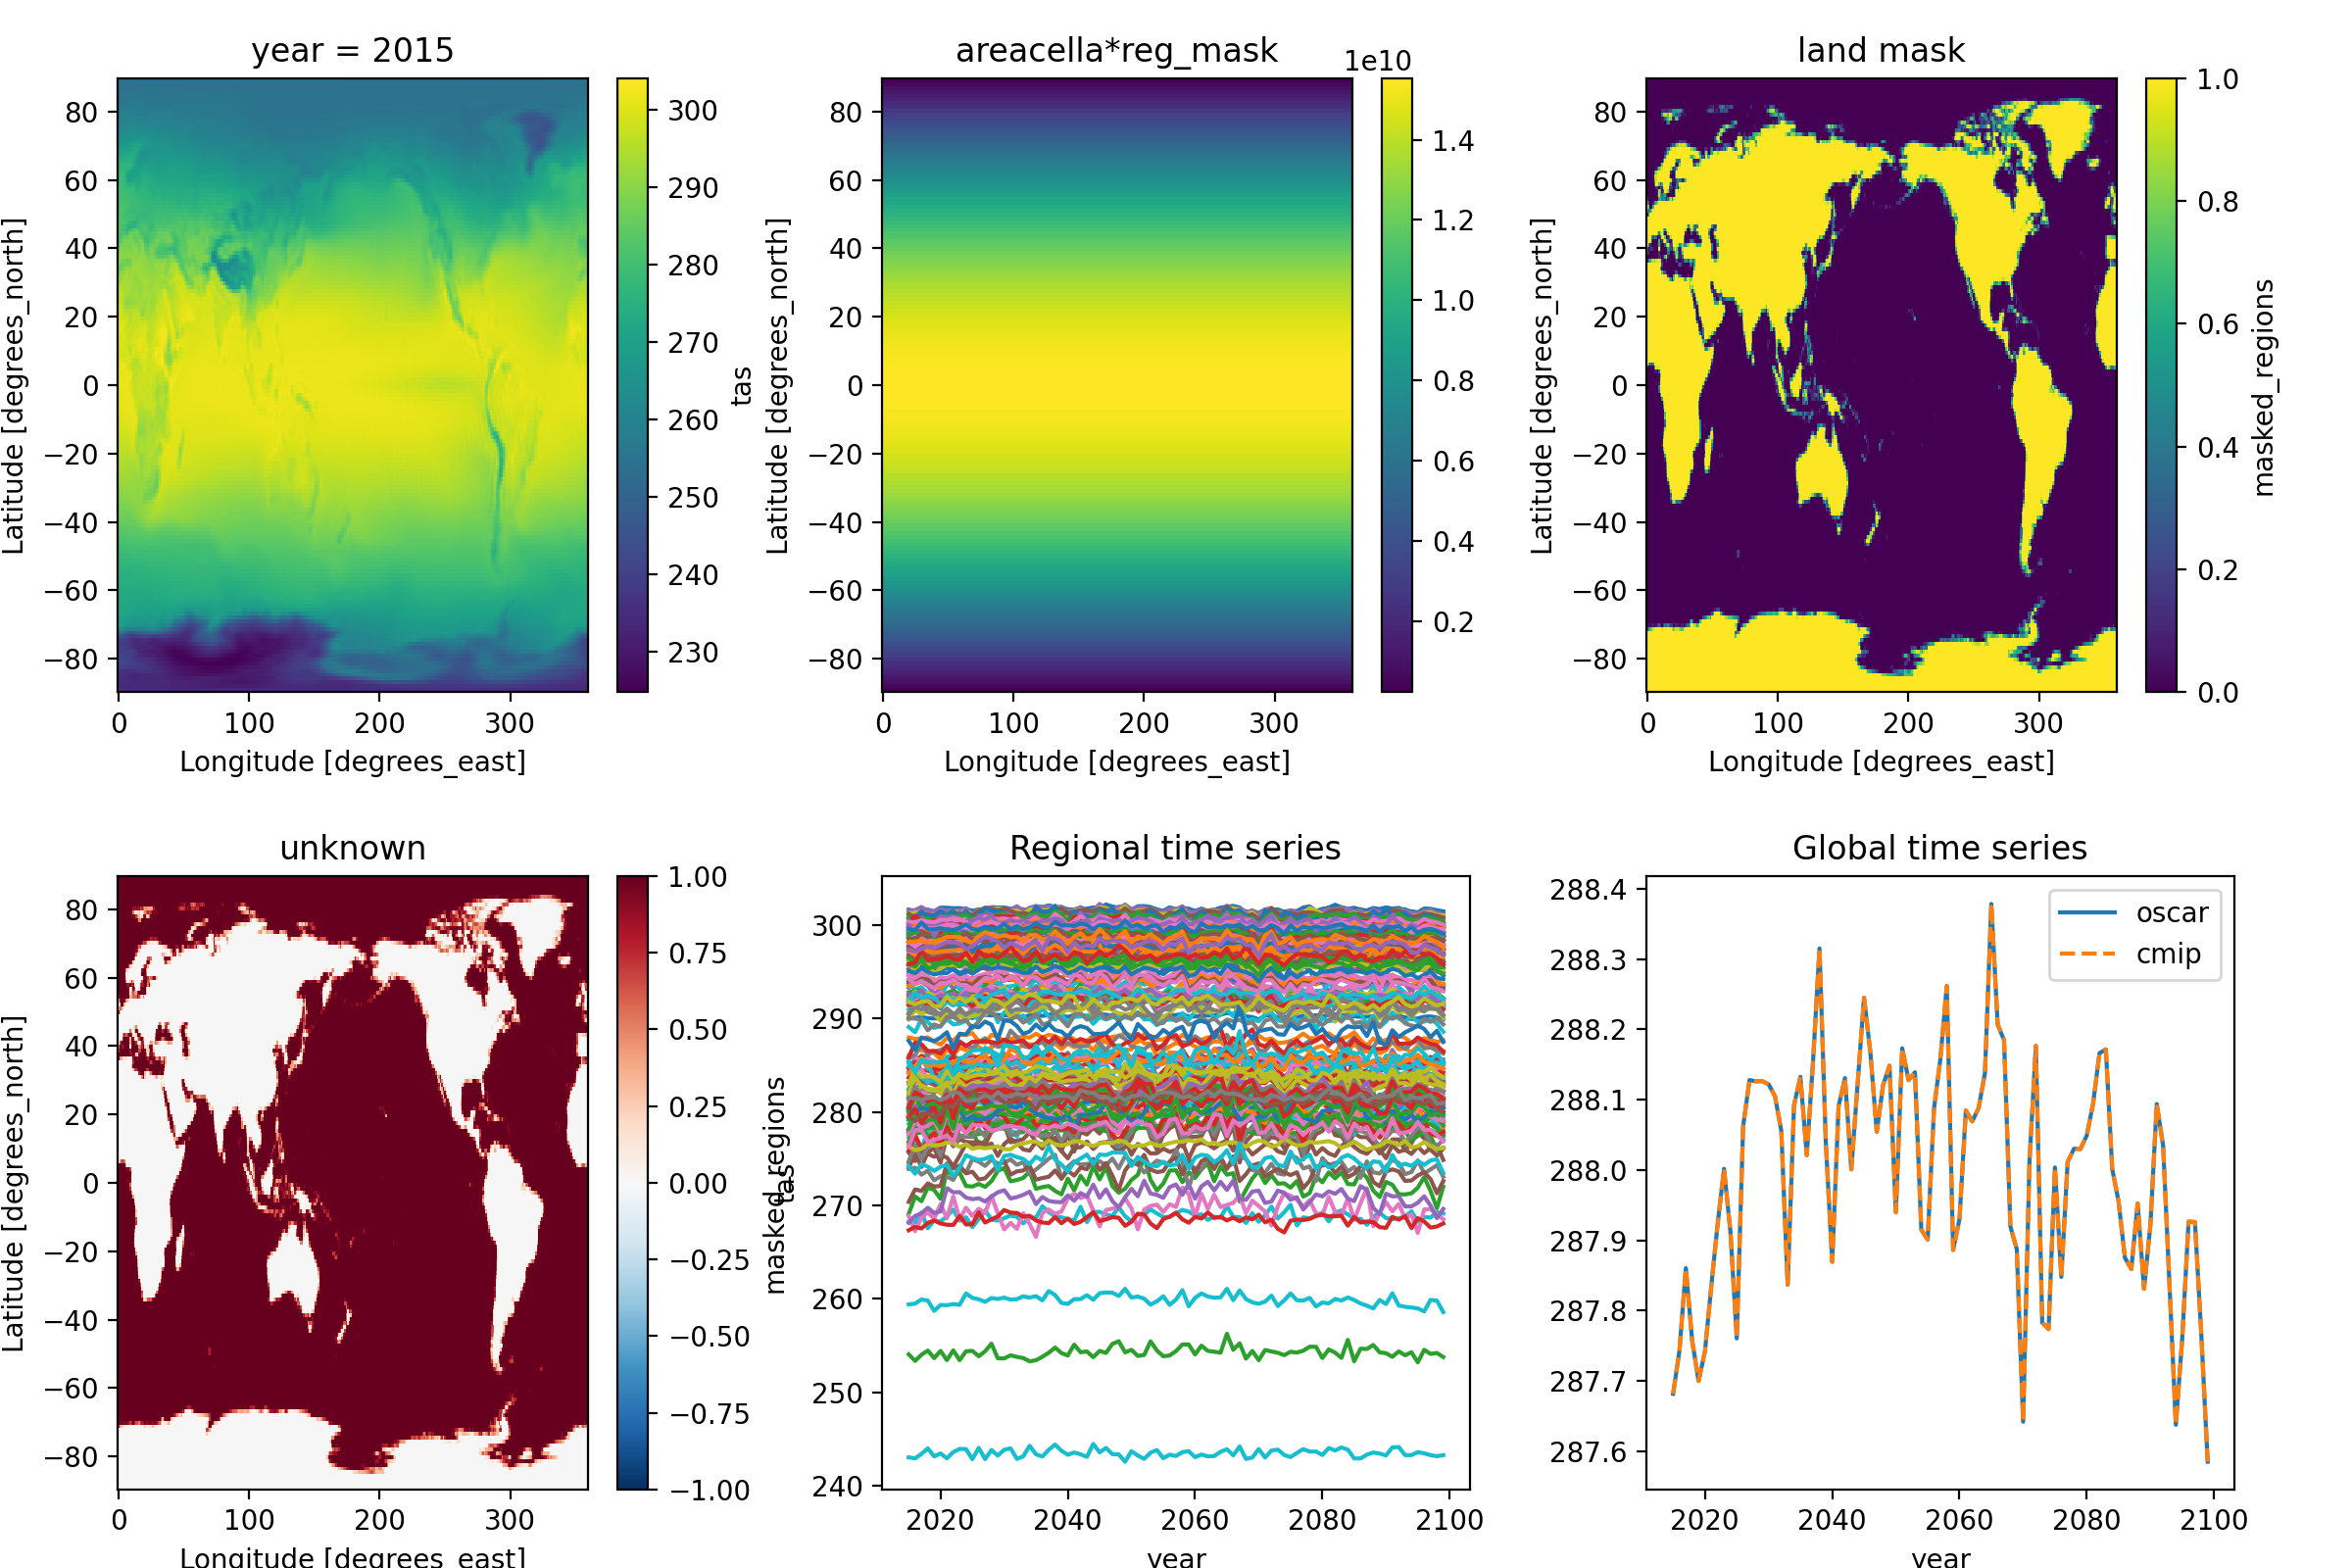

### Plotting

#### CEDS emssion data

In [29]:
ds_ceds = xr.open_dataset('data/emissions_CEDS.nc')
ds_ceds

<xarray.Dataset>
Dimensions:           (year: 275, sector: 17, reg_mask: 249, scen: 10)
Coordinates:
  * year              (year) int64 1750 1751 1752 1753 ... 2070 2080 2090 2100
  * sector            (sector) object 'agr' 'air' 'awb' ... 'tem' 'tra' 'wst'
  * reg_mask          (reg_mask) int64 0 1 2 3 4 5 6 ... 243 244 245 246 247 248
  * scen              (scen) object 'historical' 'ssp119' ... 'ssp534' 'ssp585'
    reg_mask_name     (reg_mask) object ...
    reg_mask_code     (reg_mask) object ...
    sector_long_name  (sector) object ...
Data variables:
    E_BC              (year, sector, reg_mask, scen) float32 ...
    E_CH4             (year, sector, reg_mask, scen) float32 ...
    E_CO              (year, sector, reg_mask, scen) float32 ...
    E_CO2             (year, sector, reg_mask, scen) float32 ...
    E_N2O             (year, sector, reg_mask, scen) float32 ...
    E_NH3             (year, sector, reg_mask, scen) float32 ...
    E_VOC             (year, sector, reg_mask, scen) float32 ...
    E_NOX             (year, sector, reg_mask, scen) float32 ...
    E_OC              (year, sector, reg_mask, scen) float32 ...
    E_SO2             (year, sector, reg_mask, scen) float32 ...
Attributes:
    info:     CEDS gridded historical and future anthropogenic emissions
    date:     21 November 2022

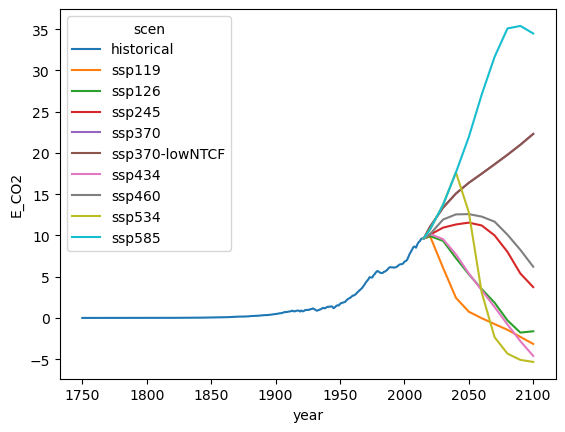

In [30]:
ds_ceds['E_CO2'].sum(['reg_mask', 'sector'], min_count=1).plot.line(x='year')

#### tas data for CMIP6 

In [23]:
ds_tas_cmip6 = xr.open_dataset('data/tas_CMIP6_for_OSCAR.nc')
ds_tas_cmip6

<xarray.Dataset>
Dimensions:        (year: 451, reg_mask: 249, experiment: 6, model: 27, ripf: 3)
Coordinates:
  * year           (year) int64 1850 1851 1852 1853 1854 ... 2297 2298 2299 2300
  * reg_mask       (reg_mask) int64 0 1 2 3 4 5 6 ... 243 244 245 246 247 248
  * experiment     (experiment) object 'historical' 'ssp119' ... 'ssp585'
  * model          (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * ripf           (ripf) object 'r1i1p1f1' 'r1i1p1f2' 'r1i1p1f3'
    reg_mask_name  (reg_mask) object ...
    reg_mask_code  (reg_mask) object ...
Data variables:
    tas            (year, reg_mask, experiment, model, ripf) float32 ...
    area           (reg_mask, experiment, model, ripf) float32 ...
Attributes:
    info:     Processed CMIP6 air_temperature data for OSCAR
    source:   https://esgf-node.llnl.gov/search/cmip6/
    date:     21 September 2022

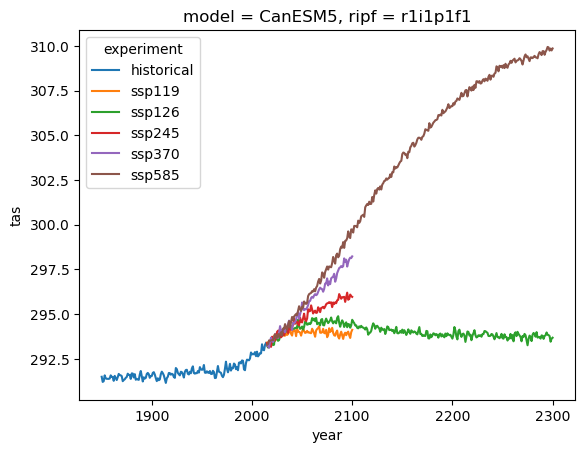

In [29]:
ds_tas_cmip6['tas'].sel(model='CanESM5', ripf='r1i1p1f1').mean('reg_mask').plot.line(x='year')

In [24]:
ds_CO2 = xr.open_dataset('data/CO2_emissions.nc')
ds_CO2

<xarray.Dataset>
Dimensions:        (year: 280, reg_mask: 249, dataset: 11)
Coordinates:
  * year           (year) int64 1750 1751 1752 1753 1754 ... 2070 2080 2090 2100
  * reg_mask       (reg_mask) int64 0 1 2 3 4 5 6 ... 243 244 245 246 247 248
    reg_mask_name  (reg_mask) object ...
    reg_mask_code  (reg_mask) object ...
  * dataset        (dataset) object 'CDIAC' 'CEDS_2017' ... 'PRIMAP_HISTTP'
Data variables:
    E_CO2          (year, reg_mask, dataset) float32 ...
Attributes:
    info:     National Fossil-Fuel CO2 Emission estimates from CEDS, EDGAR, P...
    source:   original source of the datasets
    date:     05 December 2022

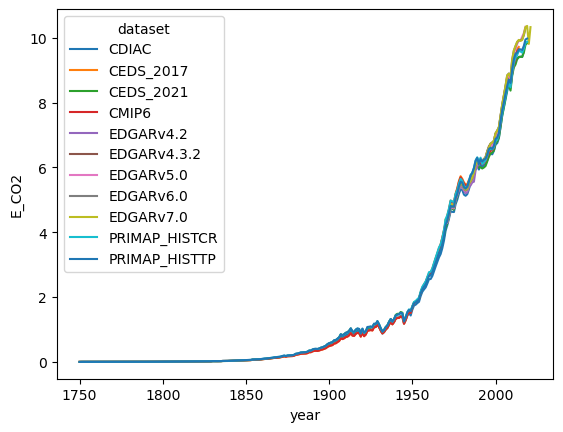

In [31]:
ds_CO2.E_CO2.sum('reg_mask', min_count=1).plot.line(x='year')

### Calling external programs

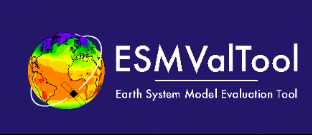

call bash inside the python script to run external programs like esmvaltool.

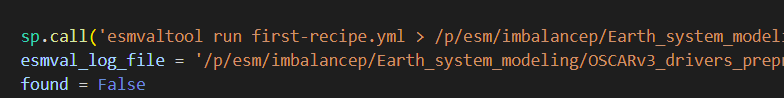

In [50]:
help(get_mask.get_full_land_mask)

Help on function get_full_land_mask in module pre_process.get_mask:

get_full_land_mask(VAR, regions=<regionmask.Regions>
Name:     Natural Earth Countries: 50m
Source:   http://www.naturalearthdata.com
overlap:  False

Regions:
  0 ZW        Zimbabwe
  1 ZM          Zambia
  2 YE           Yemen
  3 VN         Vietnam
  4 VE       Venezuela
 .. ..             ...
237 AF     Afghanistan
238 SG Siachen Glacier
239 AQ      Antarctica
240 SX    Sint Maarten
241 TV          Tuvalu

[242 regions], res=0.1)
    Description:
    ------------
    This function calculates land area including rivers, lakes, artificial reserviors, and 
    glaciated regions. Note that the actual land area calculated from here may be different
    from that used in vegetation models. 
    
    Usage:
    ------
    get_mask.get_full_land_mask(ds, regions, res)
    
    Parameters:
    -----------
    VAR     =  Xarray Dataset or DataArray
    regions = World regions, if not provided, will be calculated from region